# Loops and Functions

# For loops

### a for loop is a programming solution to reiterative applications

### for (val in sequence)
### {
### statement
### }


![title](r-for-loop.jpg)

In [32]:
a <- 1:10
b <- 1:10

In [33]:
res <- numeric(length = length(a))
for (i in seq_along(a)) {
  res[i] <- a[i] + b[i]
}
res

[1]  2  4  6  8 10 12 14 16 18 20

In [34]:
res2 <- a + b
all.equal(res, res2)

[1] TRUE

## Lets use the FARS dataset (Fatality Analysis Recording System) from 2018 It contains 33654 observations of 62 different features regarding automotive accidents that involves fatalities.

### using a For loop let's calculate the mean age.


In [37]:
FARS = read.csv("PERSON2.csv", header = T)

In [38]:
mean_age <- NULL
total <- NULL
for(i in 1:length(FARS$AGE)){
  total <- sum(total, FARS$AGE[i])
}
mean_age <- total/length(FARS$AGE)
mean_age

[1] 51.09333

# Apply family

### family of functions tht allow efficient and clean repetitive operations in multiple classes

### For a lot more details and examples see

[Dealing with Apply functions in R](https://towardsdatascience.com/dealing-with-apply-functions-in-r-ea99d3f49a71)

In [39]:
apply(FARS[27],2, mean)

AGE 
51.09333

In [40]:
mean(FARS$AGE)

[1] 51.09333

In [41]:
##How about by state
FARS$STATE = as.factor(FARS$STATE)

In [42]:
tapply(FARS$AGE, FARS$STATE, mean)

1        2        4        5        6        8        9       10 
45.68950 41.23188 84.69323 44.23729 47.52593 42.86224 51.23551 41.74038 
      11       12       13       15       16       17       18       19 
37.66667 72.83568 45.17271 56.80909 42.88679 51.19093 47.79974 46.97595 
      20       21       22       23       24       25       26       27 
48.22131 49.94880 47.30028 48.34375 47.49789 46.59475 46.26077 49.51862 
      28       29       30       31       32       33       34       35 
48.44556 53.25000 40.23214 41.70149 55.24667 47.17910 46.77905 57.77143 
      36       37       38       39       40       41       42       44 
48.11361 46.99924 43.65263 45.75703 46.58043 57.44444 50.33817 41.14286 
      45       46       47       48       49       50       51       53 
45.34227 53.50000 49.57803 47.92890 41.92827 45.78333 51.14524 48.20724 
      54       55       56 
47.75849 49.97736 41.62000

[The tidyverse universe](https://monashbioinformaticsplatform.github.io/r-more/topics/tidyverse.html)

In [43]:
library(tidyverse)
FARS %>% group_by(STATE) %>% 
  summarise(age= mean(AGE))

STATE,age
<fct>,<dbl>
1,45.68950
2,41.23188
4,84.69323
5,44.23729
6,47.52593
8,42.86224
9,51.23551
10,41.74038
11,37.66667


# IF loops

### Conditional loops

## if (test_expression) {
## statement
## }

## We can add multiple options to the conditions in a in loop

### if (test_expression) {
### statement1
### } else {
### statement2
### }


![title](r-if-else-statement.jpg)


In [44]:
x <- -5
if(x > 0){
print("Non-negative number")
} else {
print("Negative number")
}

[1] "Negative number"


In [45]:
##Nested if loops
##Calculate mean age for people younger than 40
mean_age <- NULL
total <- NULL
for(i in 1:length(FARS$AGE)){
  if (FARS$AGE[i] < 40){
    total <- sum(total, FARS$AGE[i])
  }
}
mean_age <- total/length(FARS$AGE[FARS$AGE<40])
mean_age

[1] 26.82565

In [46]:
#How can I do the same with the mean Function, tydiverse package??

In [47]:
####Calculate mean age for people younger than 40 and get gender
mean_age <- NULL
total <- NULL
gender <- vector()
age <- NULL
for(i in 1:length(FARS$AGE)){
  if (FARS$AGE[i] < 40){
    total <- sum(total, FARS$AGE[i])
    gender = c(gender,FARS$SEX[i])
    age = c(age,FARS$AGE[i])
    
  }
}

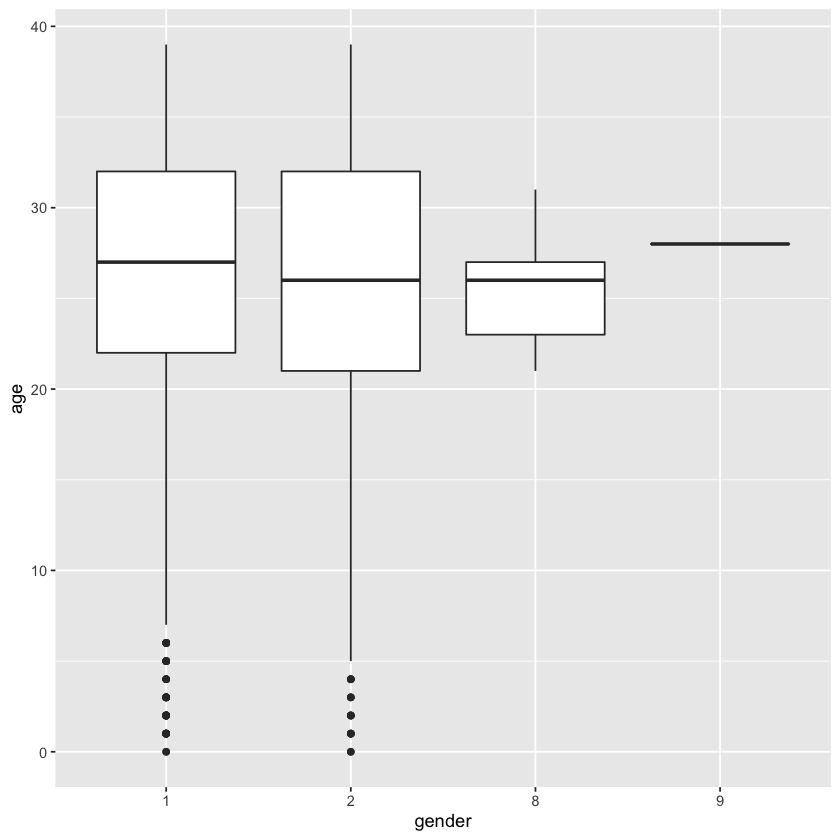

In [48]:
ageGen = as.data.frame(cbind(gender,age))
ageGen$gender = as.factor(ageGen$gender)
ggplot(ageGen, aes(x= gender,y=age))+geom_boxplot()

## ifelse function


In [49]:
a = c(5,7,2,9)
ifelse(a %% 2 == 0,"even","odd")

[1] "odd"  "odd"  "even" "odd"

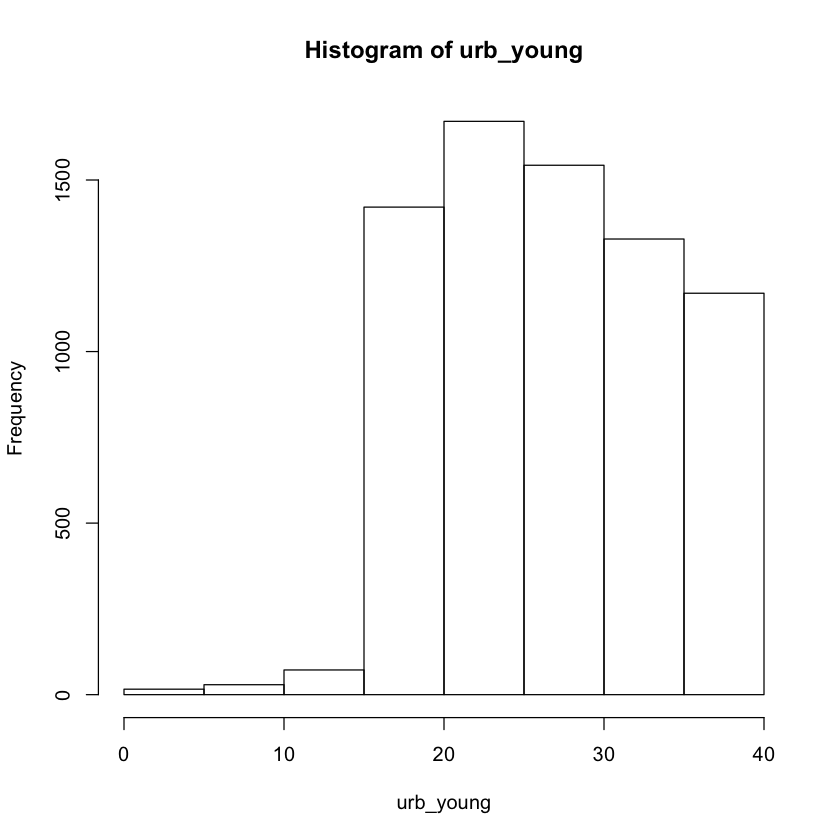

In [50]:
##Ifelse
urb_young = ifelse(FARS$RUR_URB==1 & FARS$AGE <=40, FARS$AGE,NA)
hist(urb_young)

# Functions are a packaged set of instructions that convert inputs into outputs

### There are built-in functions (sum, mean, sd, colmeans, table, etc). Compiled list of useful functions

### User can also construct its own functions.

# When to write a function

## If your script is 1000 lines long

## When you use a lot of copy and paste

## When you have lots of loops (for, if, while, etc) in your script or apply functions.

### More on functions [Functions](https://psyr.org/functions.html)


## How to write a function

### func_name <- function (argument) {
### statement
### }

In [51]:
##Functions
doubleVal = function(n){
  doub = 2 * n
  return(doub) ## or simply doub
}

In [52]:
doubleVal(10)


[1] 20

In [53]:
doubleVal(c(5,6,4,5,6))

[1] 10 12  8 10 12

In [57]:
check <- function(x) {
if (x > 0) {
result <- "Positive"
}
else if (x < 0) {
result <- "Negative"
}
else {
result <- "Zero"
}
return(result)
}

In [59]:
check(0)

[1] "Zero"

In [54]:
# function example - get measures of central tendency
# and spread for a numeric vector x. The user has a
# choice of measures and whether the results are printed.

#from https://www.statmethods.net/management/userfunctions.html
mysummary <- function(x,npar=TRUE,print=TRUE) {
  if (!npar) {
    center <- mean(x); spread <- sd(x)
  } else {
    center <- median(x); spread <- mad(x)
  }
  if (print & !npar) {
    cat("Mean=", center, "\n", "SD=", spread, "\n")
  } else if (print & npar) {
    cat("Median=", center, "\n", "MAD=", spread, "\n")
  }
  result <- list(center=center,spread=spread)
  return(result)
}

In [55]:
set.seed(1234)
x <- rpois(500, 4)
y <- mysummary(x)

Median= 4 
 MAD= 1.4826 


In [56]:
y <- mysummary(x, npar=FALSE, print=FALSE)
y

$center
[1] 4.052

$spread
[1] 2.01927